# t-sne 觀察 : 分群

# [教學目標]
- 觀察雙同心圓使用 t-SNE 在不同困惑度 (perplexity) 下的分群效果  
- 因為非監督模型的效果, 較難以簡單的範例看出來  
  所以非監督偶數日提供的範例與作業, 主要目的在於觀察非監督模型的效果,  
  同學只要能感受到模型效果即可, 不用執著於搞懂程式的每一個部分

# [範例重點]
- 使用同心圓的資料, 觀察 t-sne 在不同困惑度 (perplexity) 下, 分群的效果如何變化 (In[4], Out[4])

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

In [2]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(2, 5, figsize=(15, 6))
perplexities = [4, 6, 9, 14, 21, 30, 45, 66, 100]

# 設定同心圓資料點 
X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
red = y == 0 # 將 y 為 0 的 index set 存成變數 red
green = y == 1 # 將 y 為 1 的 index set 存成變數 green

In [3]:
# 繪製資料原圖
ax = subplots[0][0]
ax.set_title("Original")
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

circles, perplexity=4 in 0.88 sec
circles, perplexity=6 in 0.89 sec
circles, perplexity=9 in 0.96 sec
circles, perplexity=14 in 1 sec
circles, perplexity=21 in 1 sec
circles, perplexity=30 in 0.86 sec
circles, perplexity=45 in 0.94 sec
circles, perplexity=66 in 1.5 sec
circles, perplexity=100 in 1.3 sec


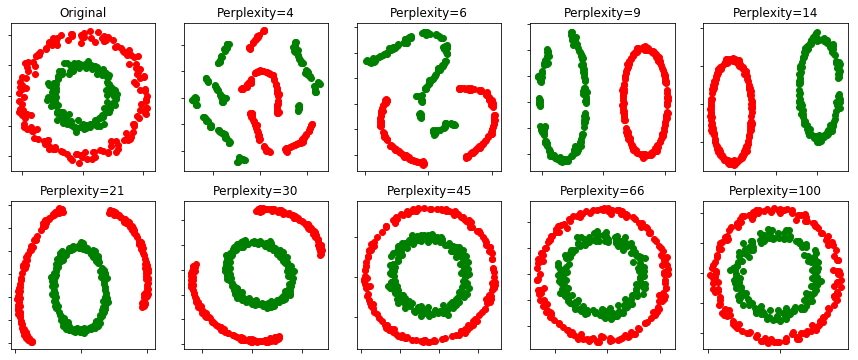

In [4]:
# 繪製不同 perplexity 下的 t-SNE 分群圖
for i, perplexity in enumerate(perplexities):
    if i<4:
        ax = subplots[0][i+1]
    else:
        ax = subplots[1][i-4]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    
plt.show()

# 觀察結果
* perplexity 越低時, 圖形越零散, 越高時不僅分群好, 也讓圖形更接近原圖
* 但 perplexity 越高, 執行時間也越久

# t-sne 觀察 : 流形還原

# [作業目標]
- 試著模仿範例寫法, 觀察 S 形使用 t-SNE , 在不同困惑度 (perplexity) 下的流形還原效果

# [作業重點]
- 使用 S 形資料集, 觀察 t-sne 在困惑度 (perplexity) 有所不同時, 流形還原的效果如何變化 
- Hint : ax.scatter(Y[red, 0], Y[red, 1], c="r") 與 ax.scatter(Y[green, 0], Y[green, 1], c="g") 兩行改一行 ax.scatter(Y[:, 0], Y[:, 1], c=color)

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

circles, perplexity=4 in 0.97 sec
circles, perplexity=6 in 0.98 sec
circles, perplexity=9 in 1.2 sec
circles, perplexity=14 in 1.1 sec
circles, perplexity=21 in 1.3 sec
circles, perplexity=30 in 1.4 sec
circles, perplexity=45 in 1.6 sec
circles, perplexity=66 in 1.8 sec
circles, perplexity=100 in 2.5 sec


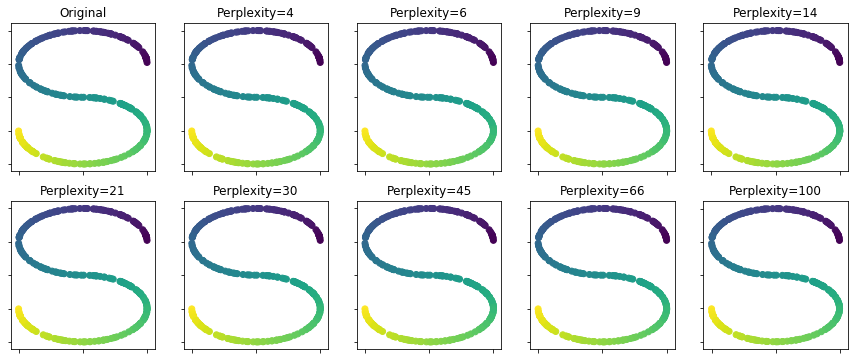

In [2]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(2, 5, figsize=(15, 6))
perplexities = [4, 6, 9, 14, 21, 30, 45, 66, 100]

# 設定S曲線資料點
X, color = datasets.samples_generator.make_s_curve(n_samples, random_state=0)



# 繪製資料原圖
ax = subplots[0][0]
ax.set_title("Original")
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')




# 繪製不同 perplexity 下的 t-SNE 流形還原圖 (請注意! 語法也要對應調整)
for i, perplexity in enumerate(perplexities):
    if i<4:
        ax = subplots[0][i+1]
    else:
        ax = subplots[1][i-4]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    
    ax.scatter(X[:, 0], X[:, 2], c=color)
    
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    
plt.show()